# Lecture 5.1: More About Exploratory Data Analysis 

<div style="border: 1px double black; padding: 10px; margin: 10px">

**Goals for today's lecture:**
* More about histogram
* the **covariation** between two variables:
    
This lecture note corresponds to parts of Chapter 7 of your book.
</div>


In [1]:
library(tidyverse)
library(nycflights13)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## More about Histogram

Let us try to plot a histogram for the variable `dep_delay` in our flights data set. 

Warning message:
“Removed 8255 rows containing non-finite values (stat_bin).”


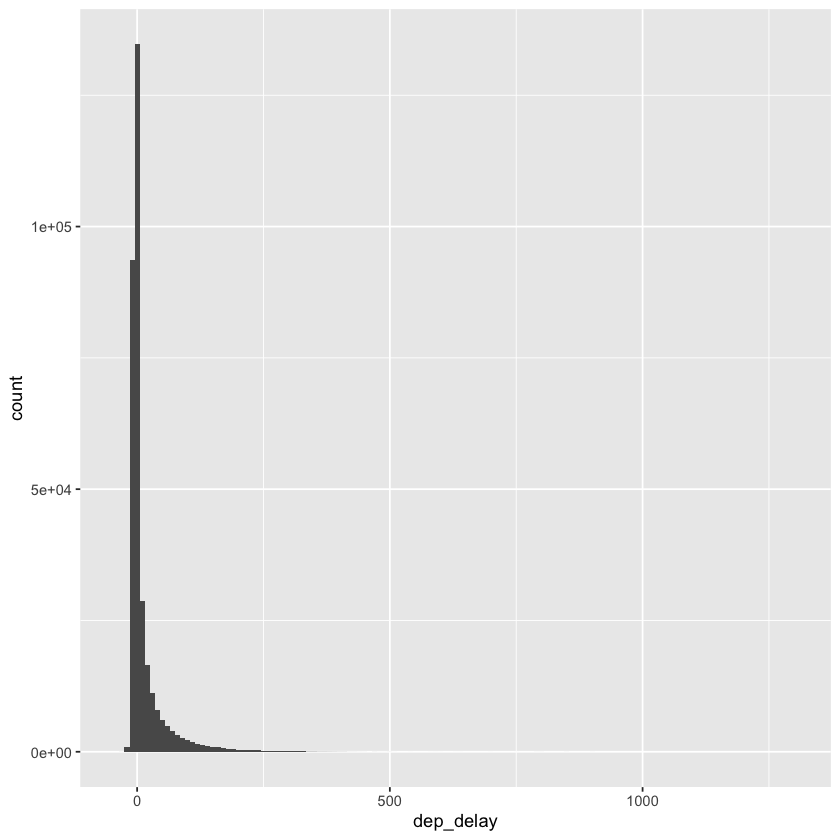

In [2]:
    ggplot(data = flights) +
        geom_histogram(mapping = aes(x = dep_delay), binwidth = 10)
# use na.rm = TRUE to suppress warning about missing values

It seems like there are 8255 rows that have missing values, so maybe let us try to remove those values first before we plot our histogram.  

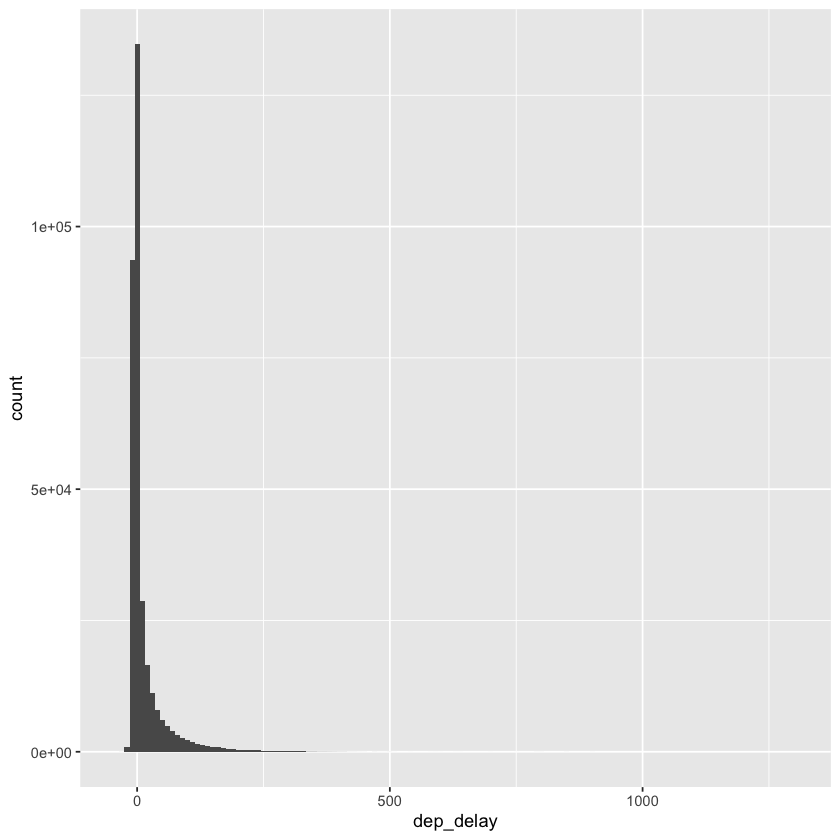

In [6]:
filter(flights, !is.na(dep_delay)) %>% ggplot()  + geom_histogram(mapping = aes(x = dep_delay), binwidth = 10)

Since we have already manually removed all of the missing values, `ggplot` will not output a warning message for us now.

Let us zoom into the left part of the plot. Let us only look at flights with departure delays of less than an hour.

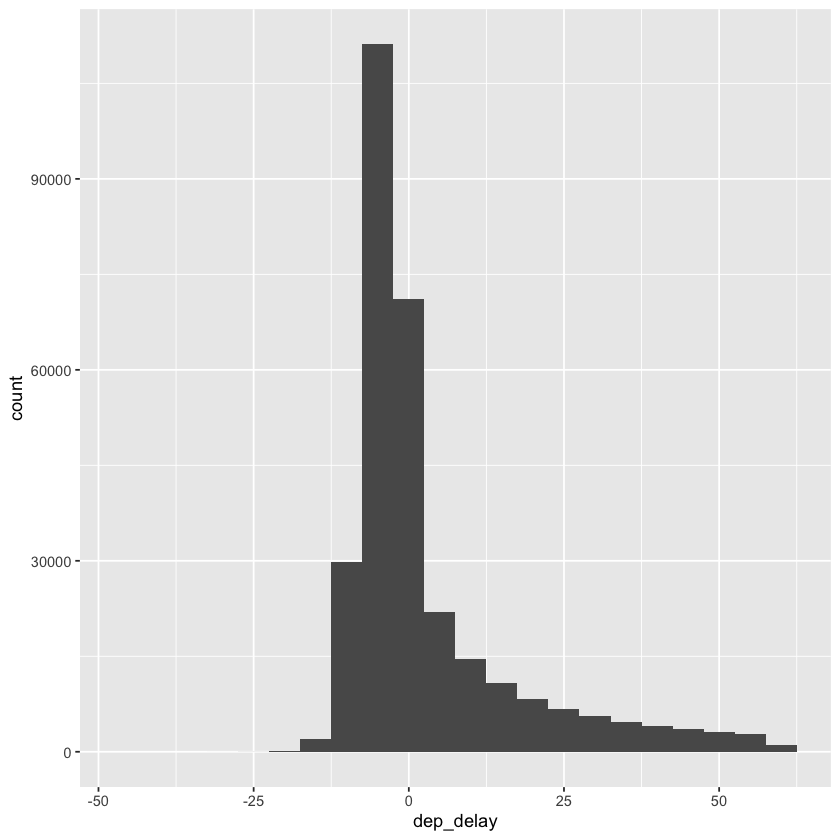

In [11]:
filter(flights, !is.na(dep_delay)) %>%
    filter(dep_delay < 60) %>%
    ggplot() +
        geom_histogram(mapping = aes(x = dep_delay), binwidth = 5) # pick a smaller binwidth for better visualization

We can look at the underlying bins and their count by using the `cut_width` function in ggplot2.

In [13]:
filter(flights, !is.na(dep_delay)) %>%
    filter(dep_delay < 60) %>%
    count(cut_width(dep_delay, 5))

"cut_width(dep_delay, 5)",n
<fct>,<int>
"[-47.5,-42.5]",1
"(-37.5,-32.5]",1
"(-32.5,-27.5]",2
"(-27.5,-22.5]",14
"(-22.5,-17.5]",160
"(-17.5,-12.5]",2079
"(-12.5,-7.5]",29878
"(-7.5,-2.5]",111111
"(-2.5,2.5]",71126


The `cut_width` function basically shows you how many observations are within each bin with bin width equal to five.

#### Remark: 
The appearance of a histogram does depend on your choice of the bin width. It is a good idea to try several values to see if different choices reveal different patterns.

We can also bring in a third variable to our histogram just like we did for `geom_bar` and others.

Let us bring in the categorical variable **carrier** and map the color aesthetic to it.


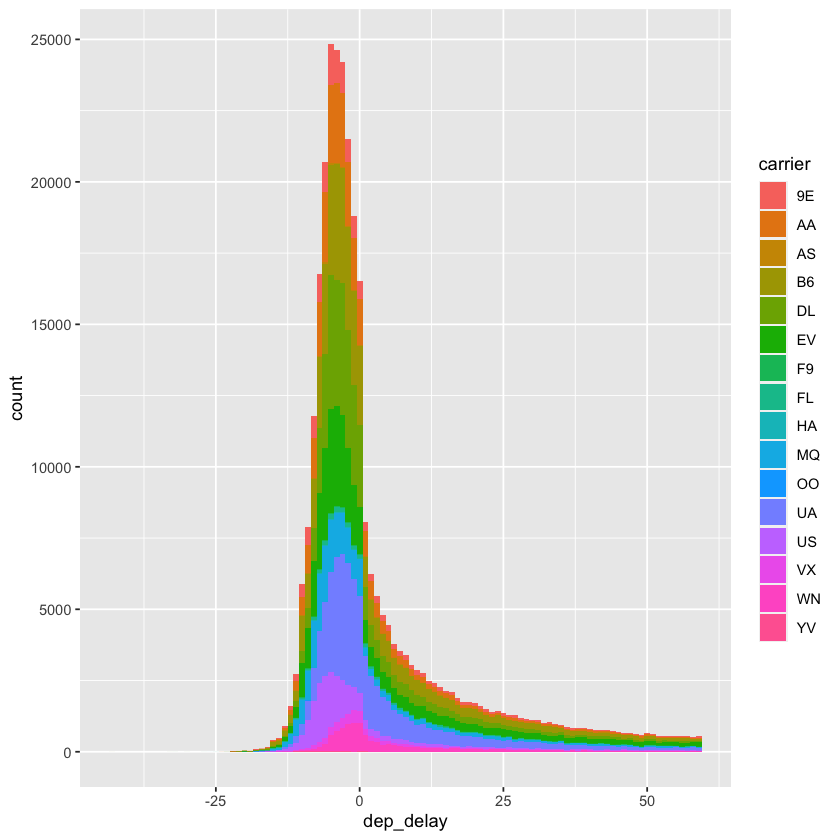

In [15]:
filter(flights, !is.na(dep_delay)) %>%
    filter(dep_delay < 60) %>%
        ggplot() +
            geom_histogram(mapping = aes(x = dep_delay, fill = carrier), binwidth = 1)

Oops! The legend is a bit crowded. Let us see who the major carriers are by number of flights.

Maybe let us just plot the historgam with the top 5 carriers. Let us find out which carriers are the top five carriers by using the tools that we have learnt so far.  

In [16]:
(top5 <- filter(flights, !is.na(dep_delay)) %>%
    group_by(carrier) %>%
    summarize(count = n()) %>%
    top_n(5, count) %>% # new function -- returns top 5 carriers ordered by count
    .[["carrier"]]) # new syntax -- extracts a column as an R vector

`summarise()` ungrouping output (override with `.groups` argument)



[1] "AA" "B6" "DL" "EV" "UA"

Now we can additionally filter out rows that do not belong to the top 5 carriers.

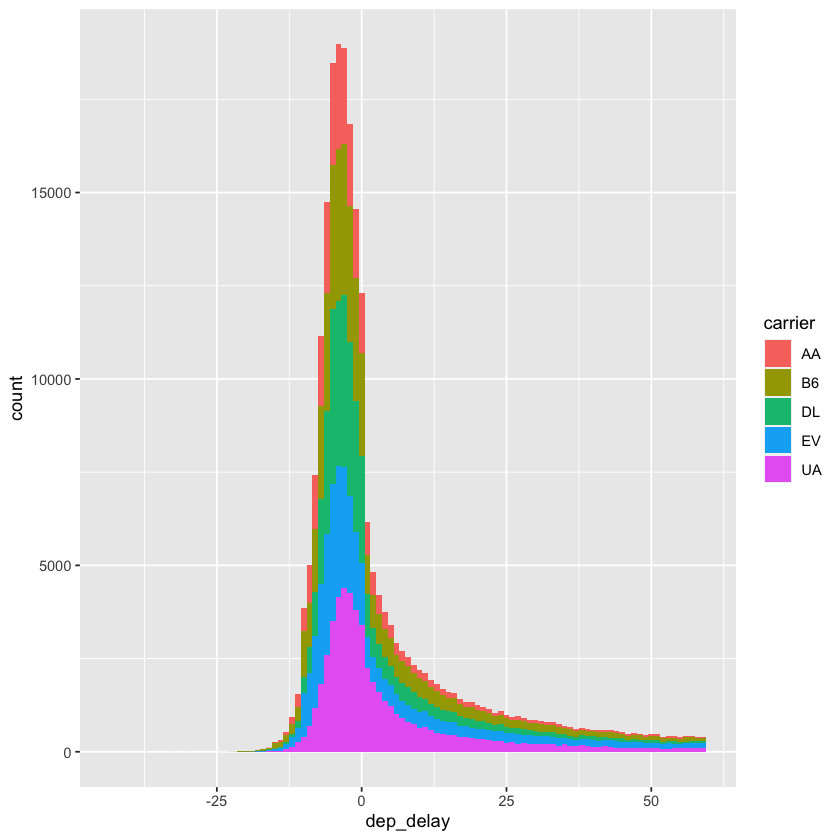

In [17]:
filter(flights, !is.na(dep_delay)) %>%
    filter(dep_delay < 60, carrier %in% top5) %>%
    ggplot() +
        geom_histogram(mapping = aes(x = dep_delay, fill = carrier), binwidth = 1)

Hmmm... May be not a good idea to stick with histograms here. It is still too crowded and it is hard to see what is going on.  So let us a new geometry **freqpoly** which is like histogram but shows lines. Overlapping lines are easier to see than overlapping bars.

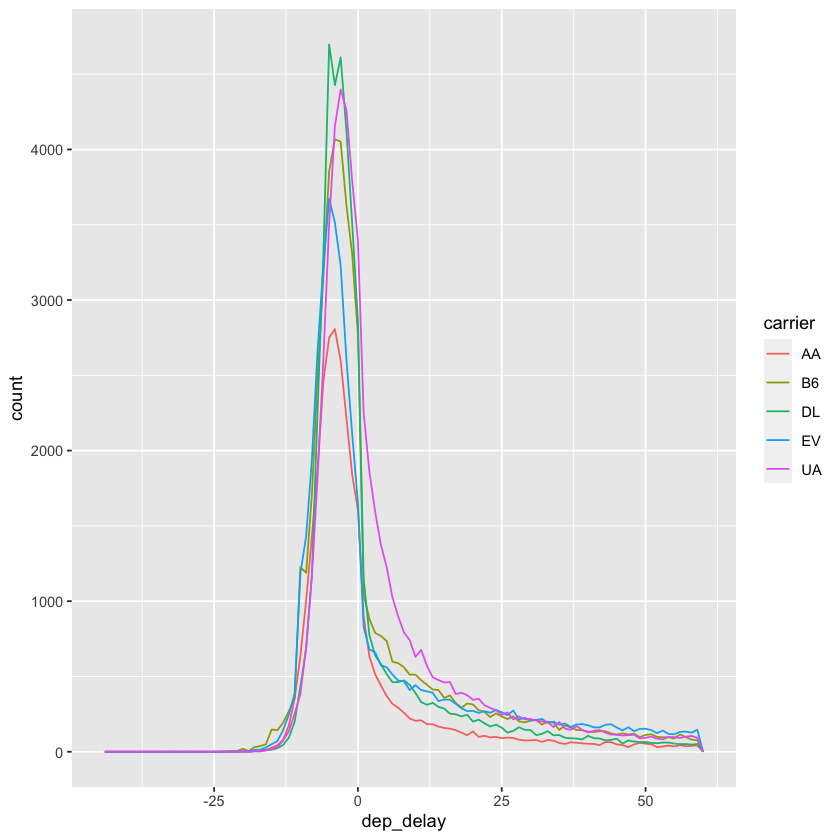

In [18]:
filter(flights, !is.na(dep_delay))  %>%
    filter(dep_delay < 60, carrier %in% top5) %>%
    ggplot() +
        geom_freqpoly(mapping = aes(x = dep_delay, color = carrier), binwidth = 1)

# Covariation Between Two Variables

### A Categorical and A Continuous Variable

In [19]:
print(mpg)

# A tibble: 234 x 11
   manufacturer model    displ  year   cyl trans   drv     cty   hwy fl    class
   <chr>        <chr>    <dbl> <int> <int> <chr>   <chr> <int> <int> <chr> <chr>
 1 audi         a4         1.8  1999     4 auto(l… f        18    29 p     comp…
 2 audi         a4         1.8  1999     4 manual… f        21    29 p     comp…
 3 audi         a4         2    2008     4 manual… f        20    31 p     comp…
 4 audi         a4         2    2008     4 auto(a… f        21    30 p     comp…
 5 audi         a4         2.8  1999     6 auto(l… f        16    26 p     comp…
 6 audi         a4         2.8  1999     6 manual… f        18    26 p     comp…
 7 audi         a4         3.1  2008     6 auto(a… f        18    27 p     comp…
 8 audi         a4 quat…   1.8  1999     4 manual… 4        18    26 p     comp…
 9 audi         a4 quat…   1.8  1999     4 auto(l… 4        16    25 p     comp…
10 audi         a4 quat…   2    2008     4 manual… 4        20    28 p     comp…
# … wit

We can map a categorical variable to, say, the **color** aesthetic in a frequency polygon of a continuous variable.

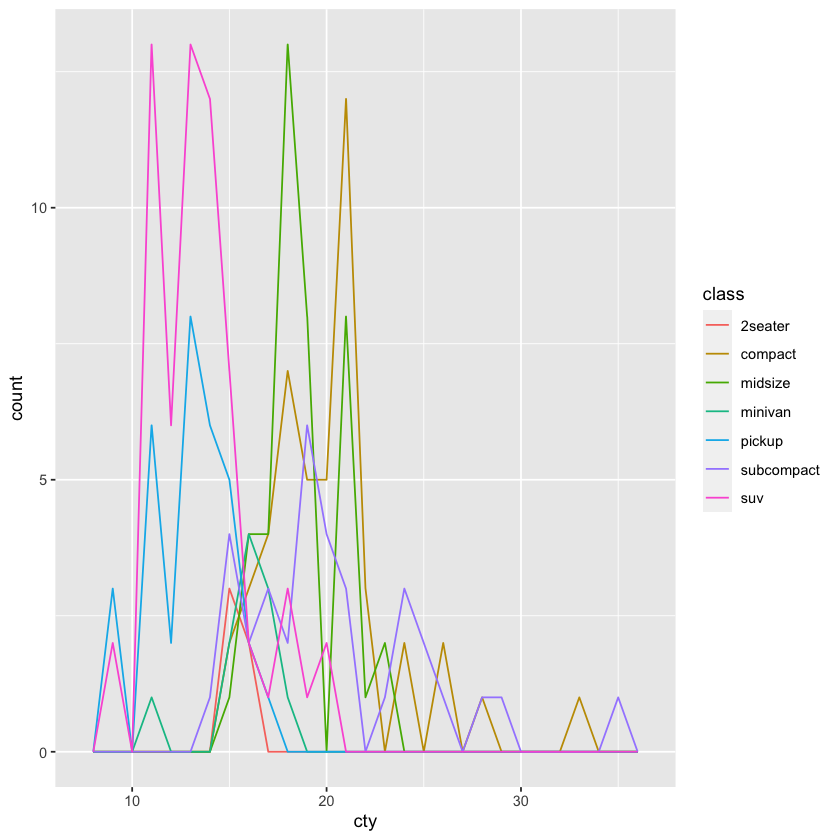

In [20]:
ggplot(data = mpg) +
    geom_freqpoly(mapping = aes(x = cty, color = class), binwidth = 1)

Mapping the `color` aesthetic to the `class` variable in a histogram does not have a good effect.

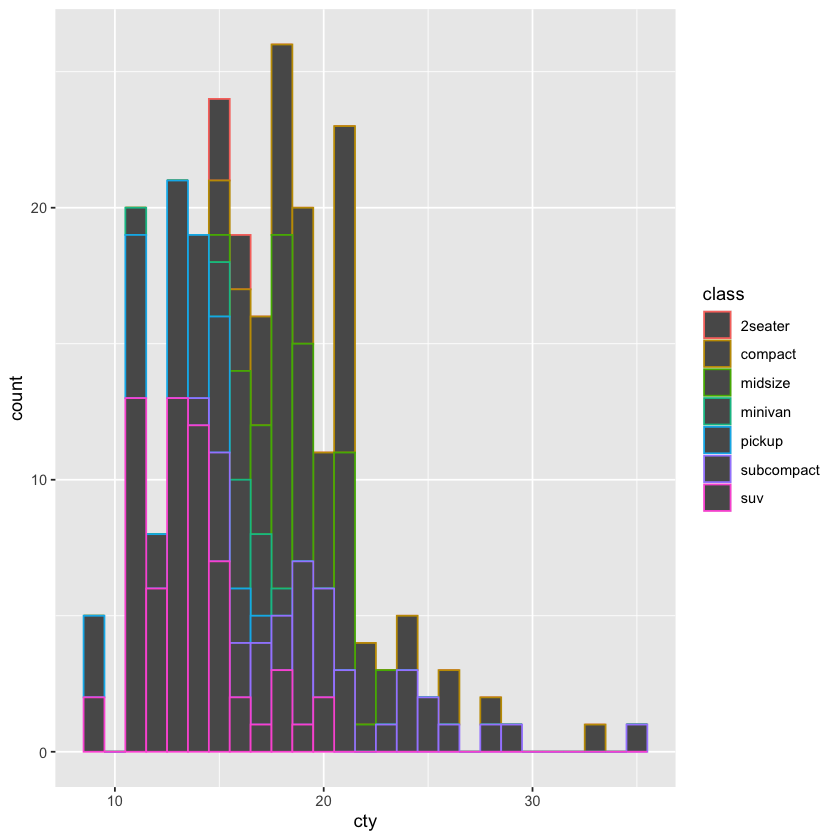

In [21]:
ggplot(data = mpg) + 
    geom_histogram(mapping = aes(x = cty, color = class), binwidth = 1)

Changing the **fill** aesthetic to the **color** aesthetic improves the appearance but the plot remains problematic.

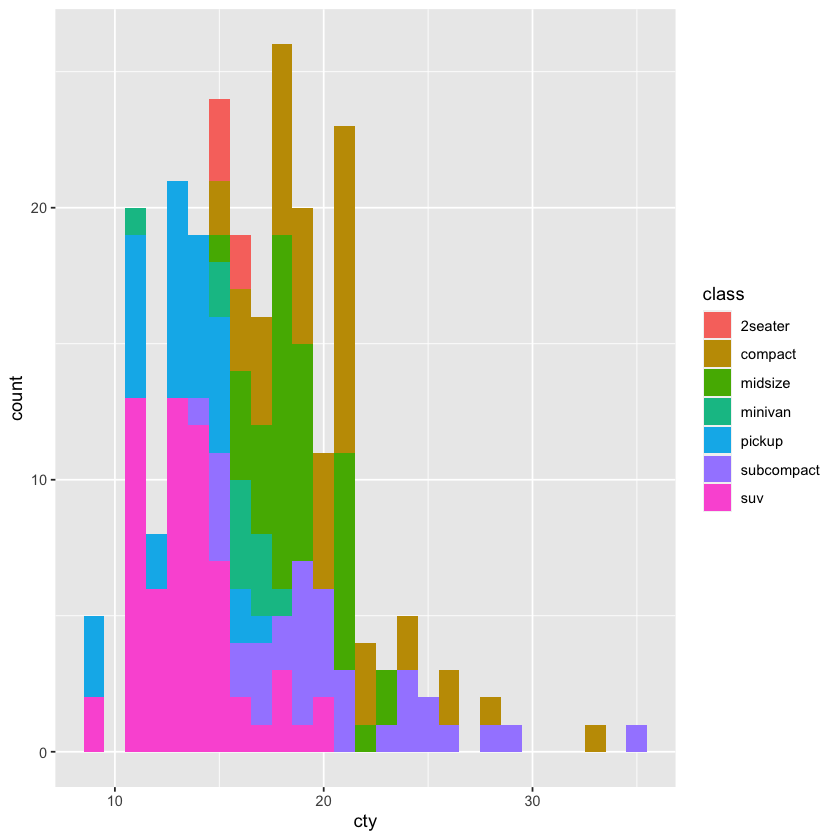

In [22]:
ggplot(data = mpg) + 
    geom_histogram(mapping = aes(x = cty, fill = class), binwidth = 1)

Another thing we can do with a categorical, continuous pair is to use a **boxplot**.

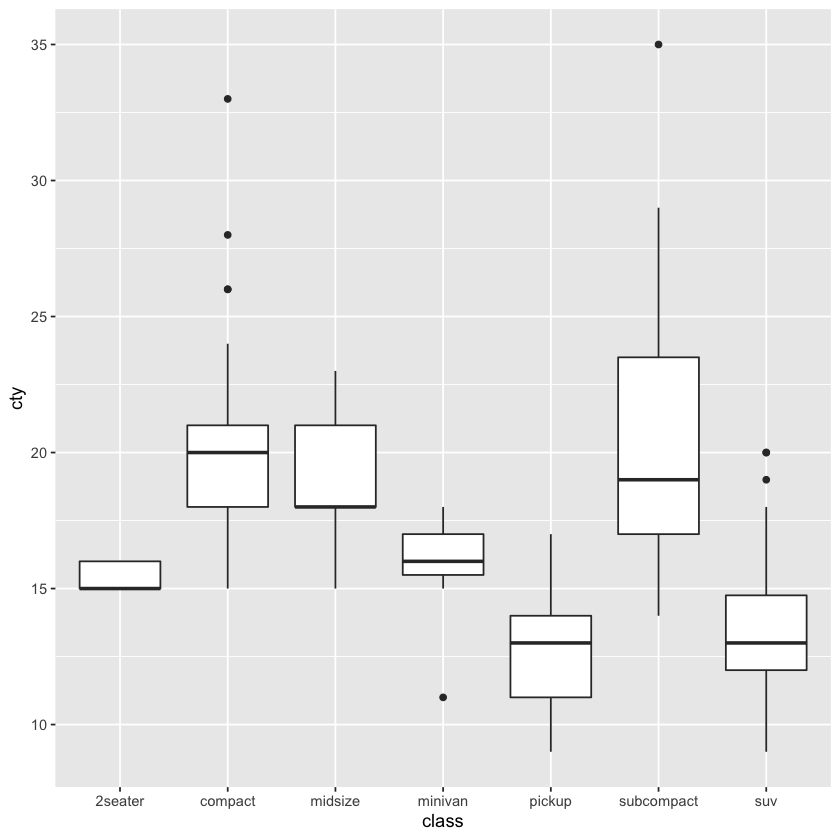

In [24]:
ggplot(data = mpg) + 
    geom_boxplot(mapping = aes(x = class, y = cty))

* The lower and upper hinges correspond to the first and third quartiles (the 25th and 75th percentiles).
* The upper whisker extends from the hinge to the largest value no further than 1.5 * IQR from the hinge (where IQR is the inter-quartile range, or distance between the first and third quartiles).
* The lower whisker extends from the hinge to the smallest value at most 1.5 * IQR of the hinge.
* Data beyond the end of the whiskers are called "outlying" points and are plotted individually.

To replot with `class` values listed in order of the median value for `cty`, we can use the `reorder()` function.

```
reorder(cat, con, FUN = median)
```

reorders the levels of the categorical variable `cat` according the continuous variable `con`. The function `median()` is applied the the `con` values corresponding to a fixed level of `cat`. Default value of the `FUN` argument is `mean`.

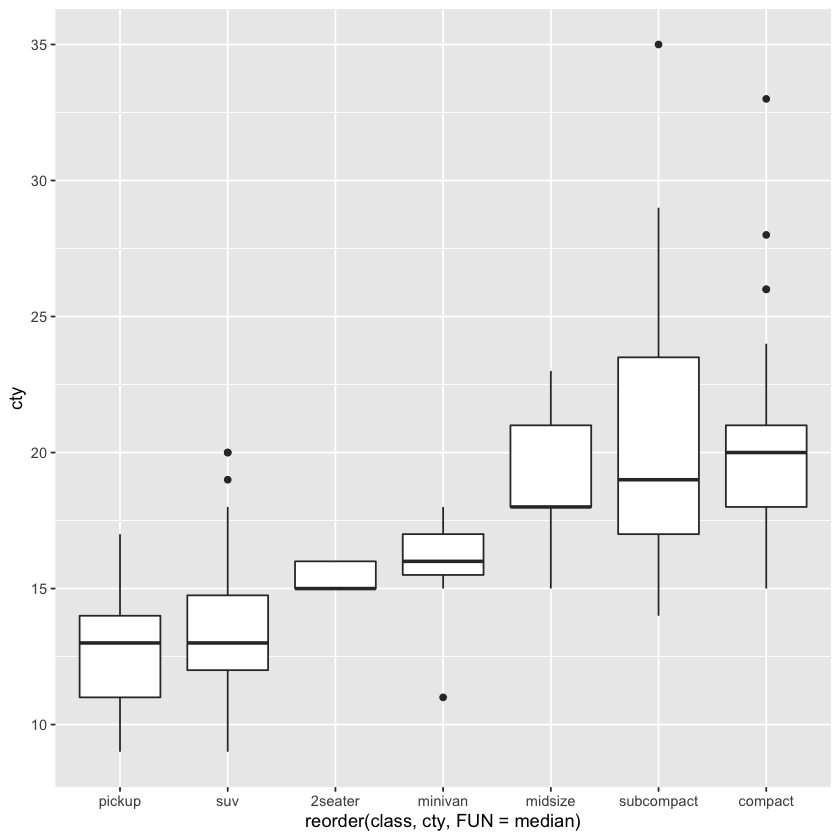

In [25]:
ggplot(data = mpg) +
    geom_boxplot(mapping = aes(x = reorder(class, cty, FUN = median), y = cty))

We can flip the x, y axes if the categorical level names are long

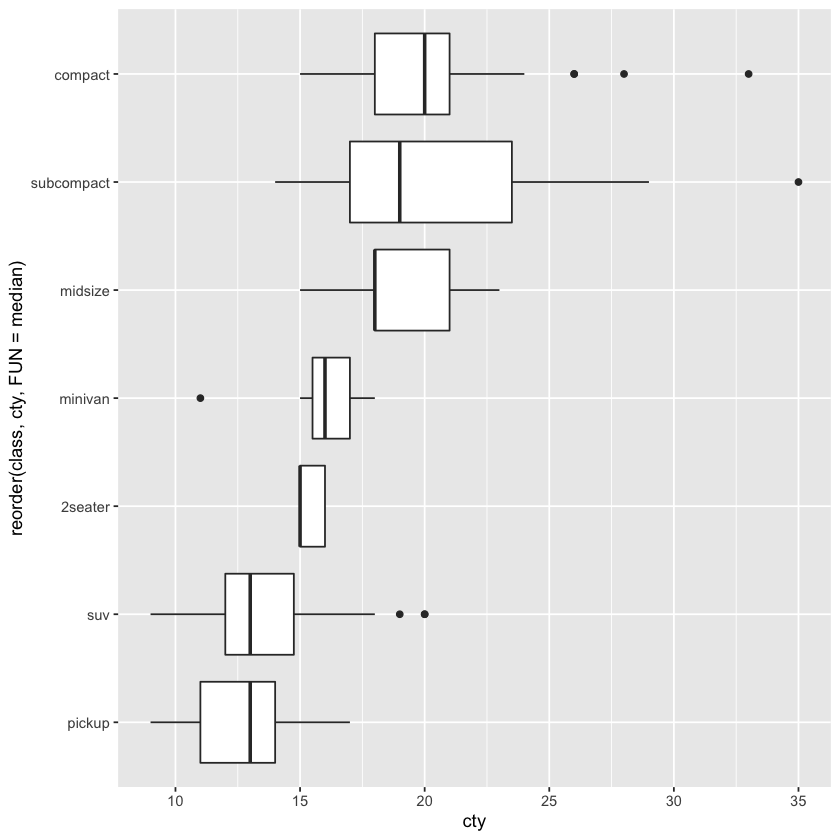

In [26]:
ggplot(data = mpg) + 
    geom_boxplot(mapping = aes(x = reorder(class, cty, FUN = median), y = cty)) +
    coord_flip()

Contrast this with faceting the `cty` histogram on the `class` variable.

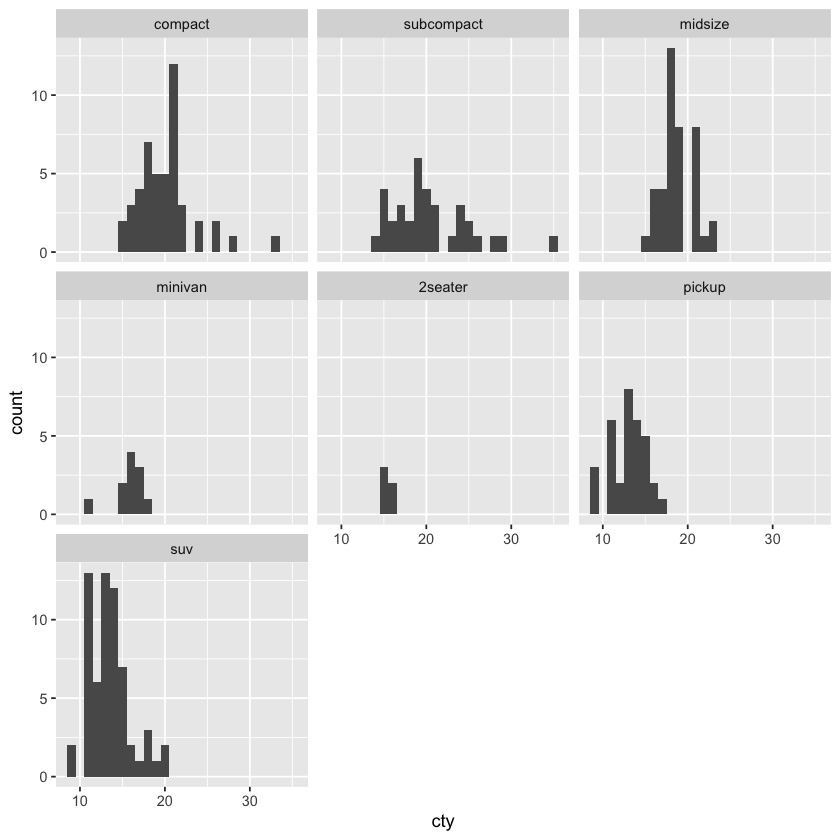

In [27]:
ggplot(data = mpg) + 
    geom_histogram(mapping = aes(x = cty), binwidth = 1) +
    facet_wrap(~ reorder(class, desc(cty), FUN = median))

We can also superimpose the points themselves on top of the boxplot by adding `geom_jitter`. But it is a good idea to hide the outliers by setting `outlier.shape = NA` first.

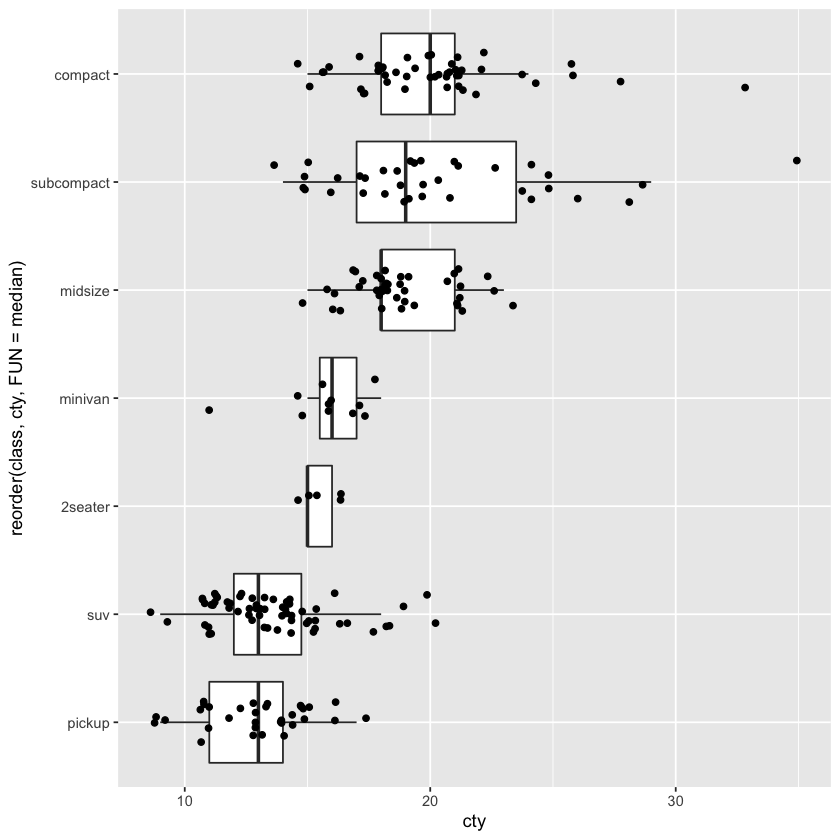

In [28]:
ggplot(data = mpg, mapping = aes(x = reorder(class, cty, FUN = median), y = cty)) + 
    geom_boxplot(outlier.shape = NA) +
    geom_jitter(width = .2) +
    coord_flip()

# Two categorical variables

`geom_count` can be used to visualize two categorical variables.`geom_count` can be used to visualize two categorical variables.

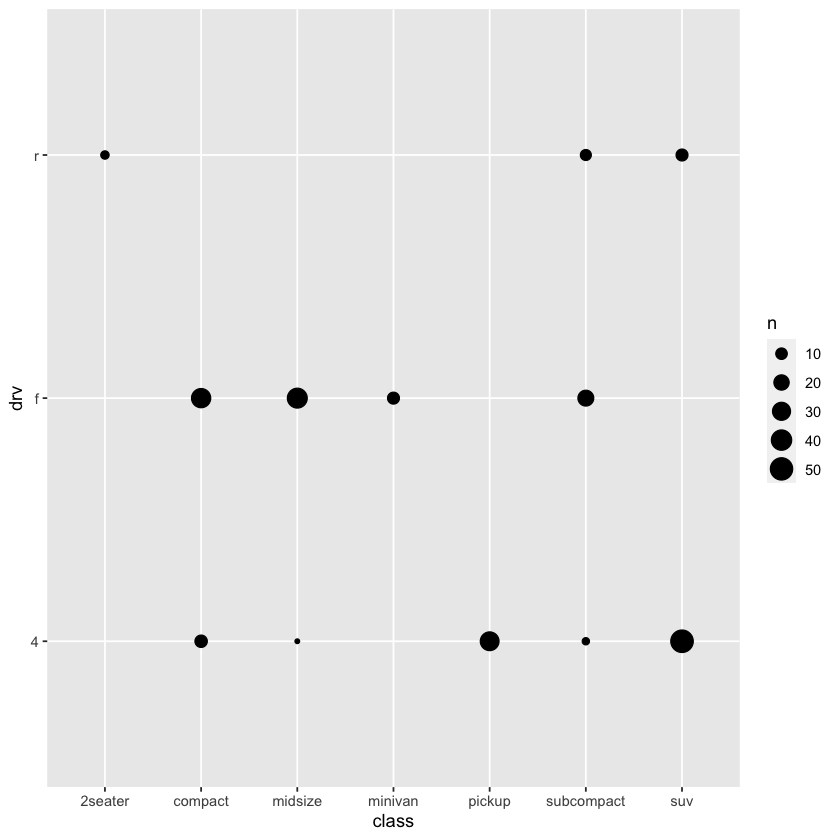

In [29]:
ggplot(data = mpg) +
    geom_count(mapping = aes(x = class, y = drv))

We can compute these numbers using `count()`.

In [30]:
mpg %>%
    count(class, drv)

class,drv,n
<chr>,<chr>,<int>
2seater,r,5
compact,4,12
compact,f,35
midsize,4,3
midsize,f,38
minivan,f,11
pickup,4,33
subcompact,4,4
subcompact,f,22


These counts can be fed to other geometries.

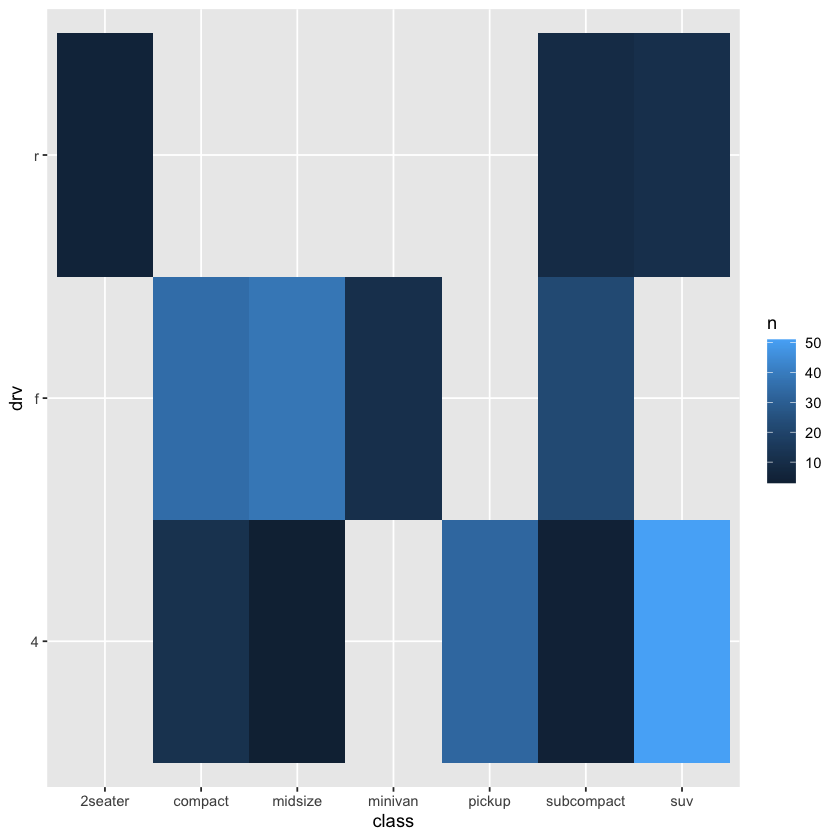

In [31]:
mpg %>%
    count(class, drv) %>%
    ggplot() +
        geom_tile(mapping = aes(x = class, y = drv, fill = n))

# Two continuous variables

We already know a lot about scatterplots. Once you have too many points, you may want to use `geom_bin2d` or `geom_hex`.We already know a lot about scatterplots. Once you have too many points, you may want to use `geom_bin2d` or `geom_hex`.

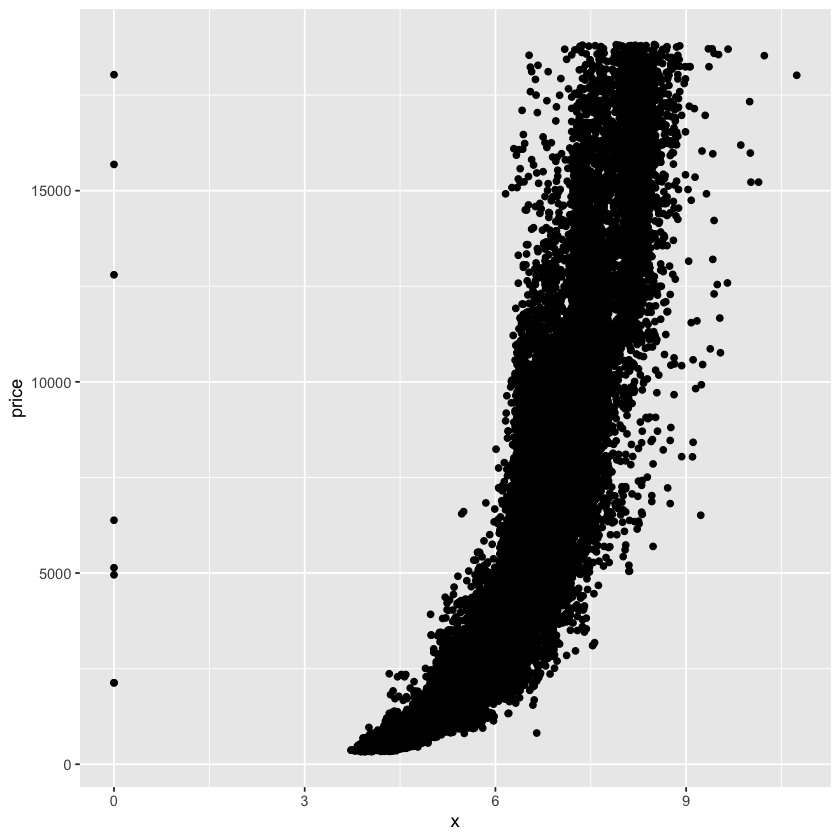

In [32]:
ggplot(data = diamonds) +
    geom_point(mapping = aes(x = x, y = price))

Sometimes setting the transparency of points using `alpha` can help.

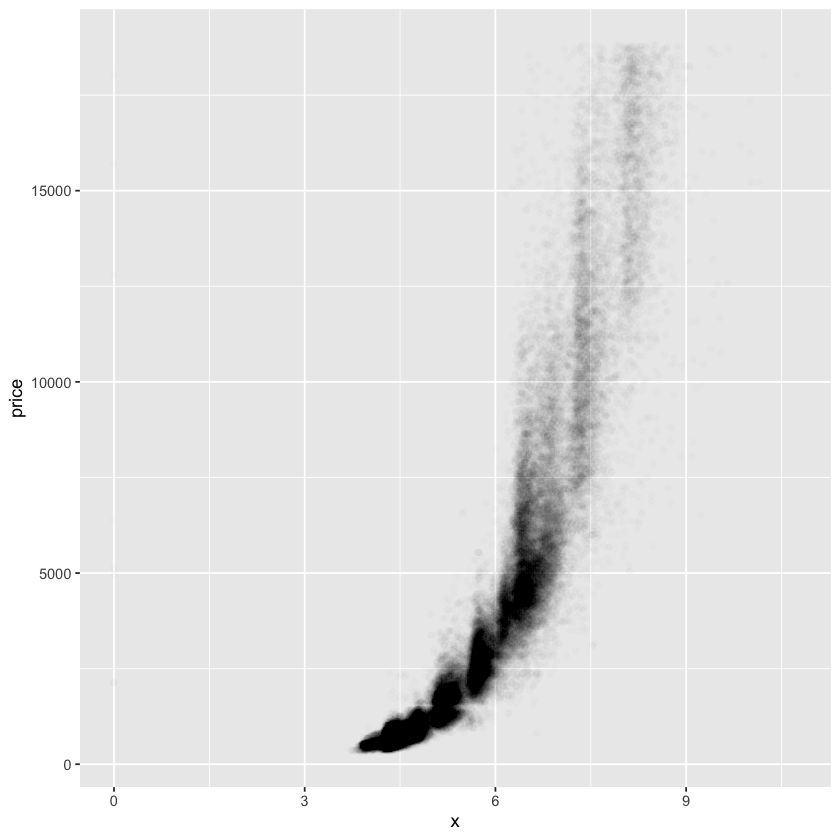

In [33]:
ggplot(data = diamonds) +
    geom_point(mapping = aes(x = x, y = price), alpha = 0.01)

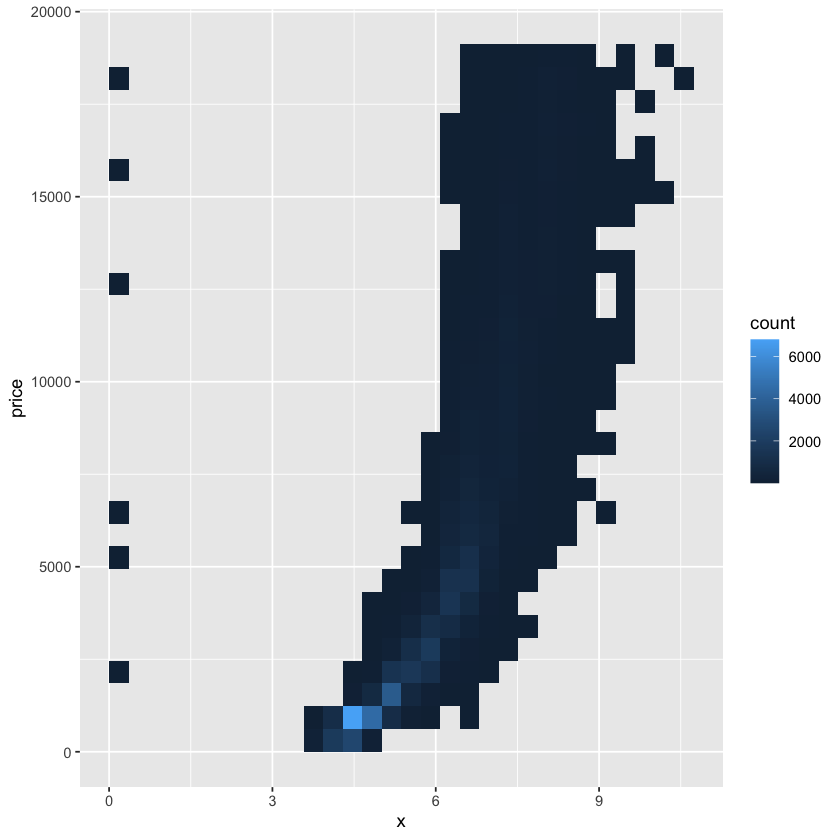

In [34]:
ggplot(data = diamonds) +
    geom_bin2d(mapping = aes(x = x, y = price))

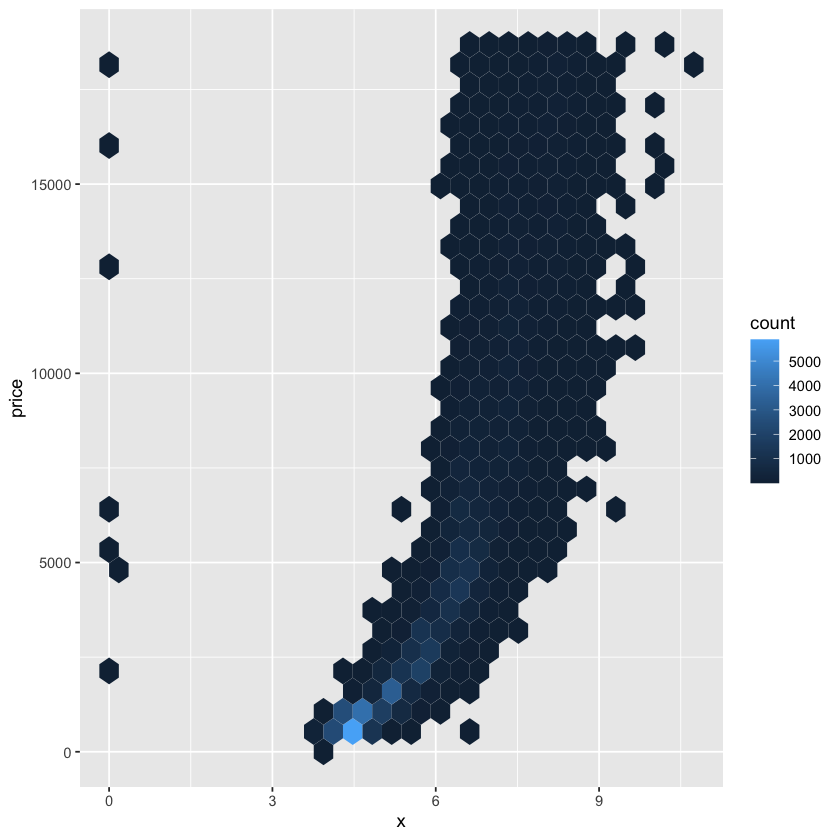

In [37]:
ggplot(data = diamonds) +
    geom_hex(mapping = aes(x = x, y = price))

Let us try to see what happens if we use a boxplot with 2 continuous variables: `price` as a function of `carat` for the `diamonds` tibble.

Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”


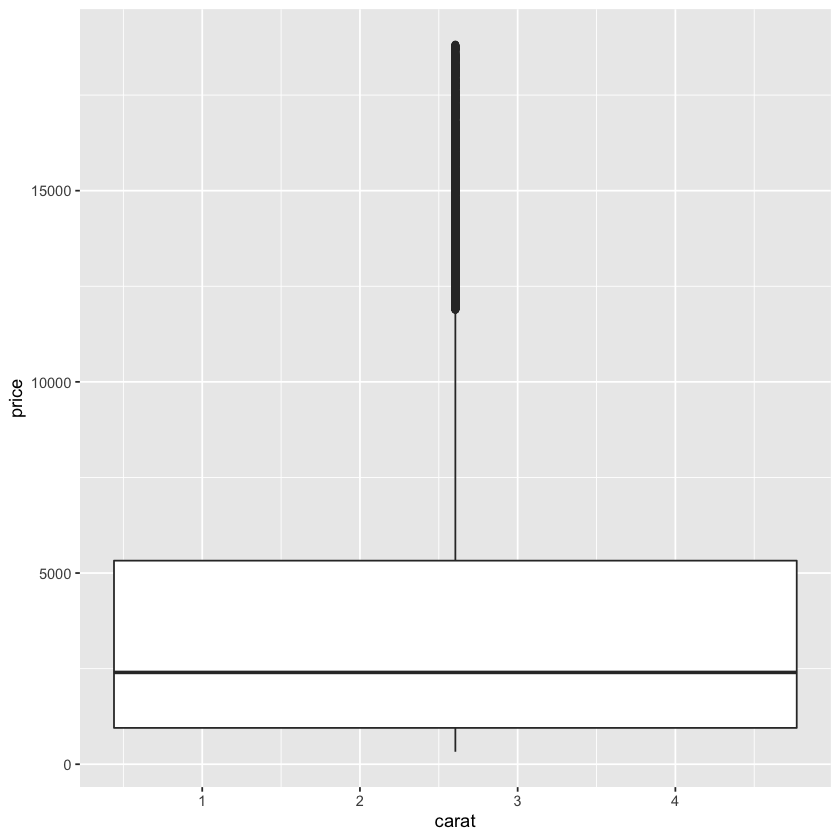

In [38]:
ggplot(data = diamonds) +
    geom_boxplot(mapping = aes(x = carat, y = price))

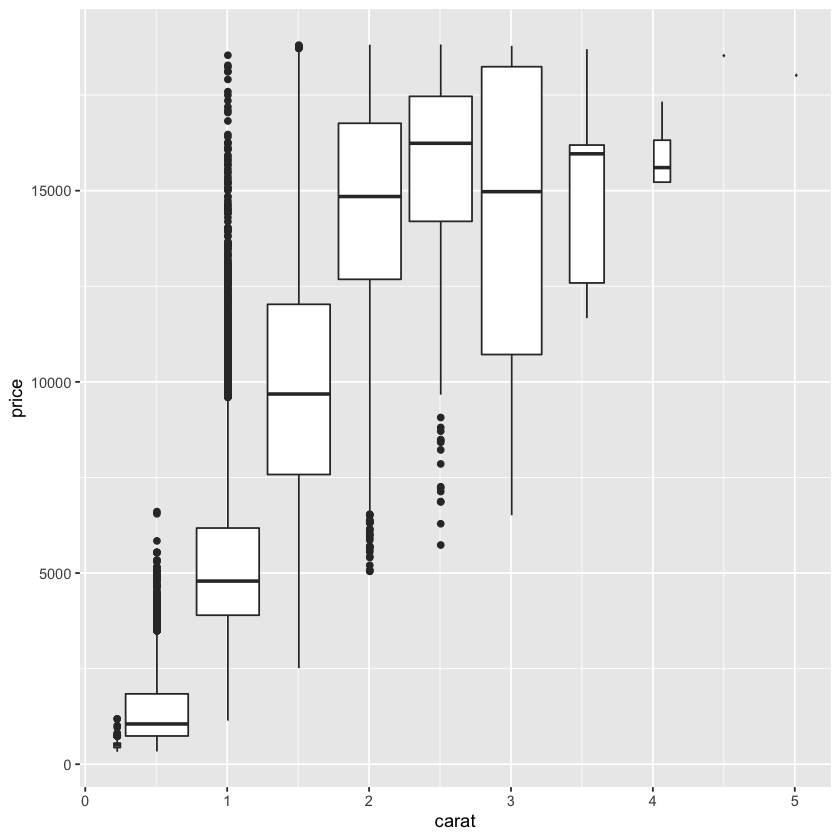

In [39]:
ggplot(data = diamonds) +
    geom_boxplot(mapping = aes(x = carat, y = price, group = cut_width(carat, 0.5)))

If outliers run into each other, you could adjust `outlier.alpha`.

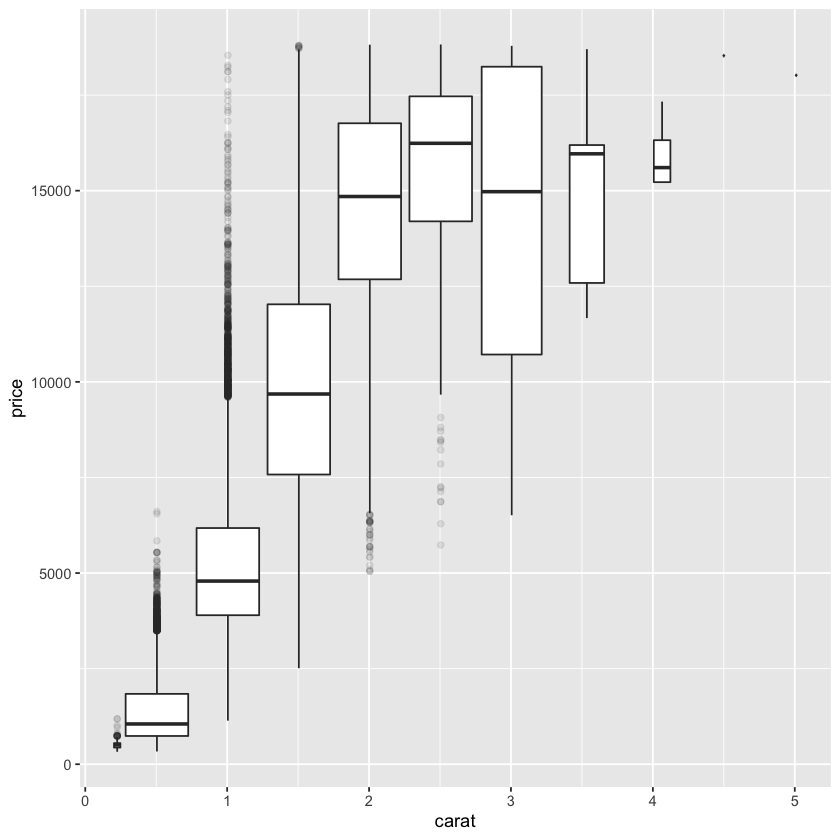

In [40]:
ggplot(data = diamonds) +
    geom_boxplot(mapping = aes(x = carat, y = price, group = cut_width(carat, 0.5)), outlier.alpha = 0.1)